In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
#plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'

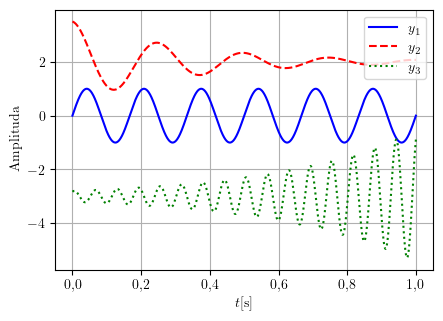

In [5]:
time = np.linspace(0, 1, 1000)
x = np.sin(time*2*np.pi*6)
x2 = 1.5*np.cos(time*2*np.pi*4)*np.e**(-time*3) + 2
x3 = 0.2*np.sin(time*2*np.pi*16 + np.pi/3)*np.e**(time*2.5) - 3
plt.plot(time,x, 'b', label=r'$y_1$')
plt.plot(time,x2, 'r', label=r'$y_2$',linestyle='dashed')
plt.plot(time,x3, 'g', label=r'$y_3$',linestyle='dotted')
plt.xlabel(r'$t$[s]')
plt.ylabel('Amplituda')
plt.grid()
plt.legend(loc=1)
plt.savefig('py_teorija/osc_py.pdf', format='pdf', bbox_inches='tight')

<h3> Aproksimacija sinΘ = Θ</h3>

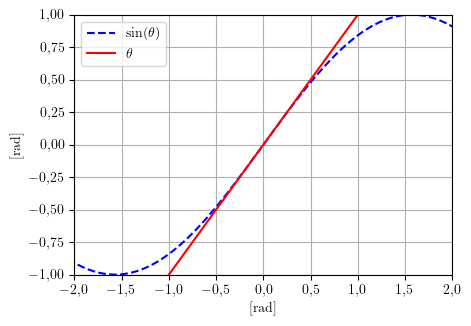

In [6]:
time2 = np.linspace(-np.pi,np.pi,1000)
y = np.sin(time2)
y2 = time2
plt.plot(time2,y,'b',label=r'sin($\theta$)',linestyle='dashed')
plt.plot(time2,y2,'r',label=r'$\theta$')
plt.ylim(-1,1)
plt.xlim(-2,2)
plt.xlabel('[rad]')
plt.ylabel('[rad]')
plt.grid()
plt.legend()
plt.savefig('py_teorija/theta_approx.pdf', format='pdf', bbox_inches='tight')

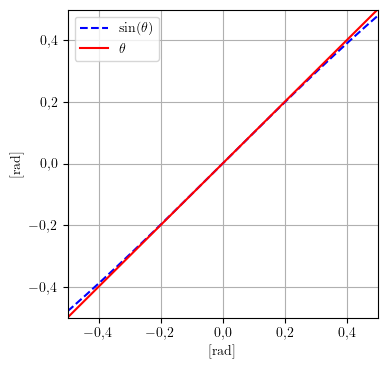

In [7]:
plt.figure(figsize=(4,4))
plt.plot(time2,y,'b',label=r'sin($\theta$)',linestyle='dashed')
plt.plot(time2,y2,'r',label=r'$\theta$')
plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.xlabel('[rad]')
plt.ylabel('[rad]')
plt.grid()
plt.legend()
plt.savefig('py_teorija/theta_approx2.pdf', format='pdf', bbox_inches='tight')

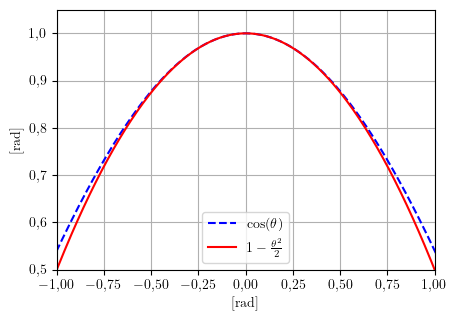

In [8]:
theta = np.linspace(-np.pi,np.pi,1000)
y3 = np.cos(theta)
y4 = 1 - theta**2/2
plt.plot(theta,y3,'b',label=r'cos($\theta$)',linestyle='dashed')
plt.plot(theta,y4,'r',label=r'$1-\frac{\theta^2}{2}$')
plt.ylim(0.5,1.05)
plt.xlim(-1,1)
plt.xlabel('[rad]')
plt.ylabel('[rad]')
plt.grid()
plt.legend(loc='lower center')
plt.savefig('py_teorija/cos_approx.pdf', format='pdf', bbox_inches='tight')

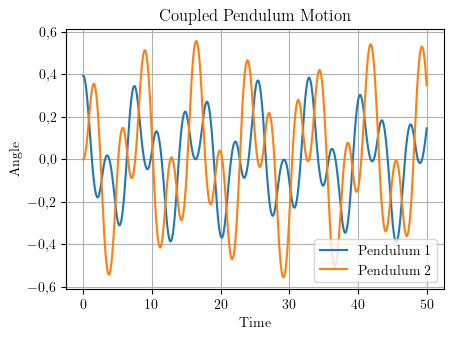

In [62]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters
L1 = 10.0  # Length of the first pendulum
L2 = 10.0  # Length of the second pendulum
m1 = 1.0  # Mass of the first pendulum
m2 = 1.0  # Mass of the second pendulum
g = 9.81  # Acceleration due to gravity

# Define the system of ODEs
def coupled_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [
        omega1,
        (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) -
         2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) /
        (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))),
        omega2,
        (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) +
         omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) /
        (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    ]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi/8, 0, 0, 0]

# Time span for the simulation
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODEs
solution = solve_ivp(coupled_pendulum, t_span, initial_conditions, t_eval=t_eval)

# Extract angles
theta1_vals = solution.y[0]
theta2_vals = solution.y[2]

# Plot the results
plt.plot(t_eval, theta1_vals, label='Pendulum 1')
plt.plot(t_eval, theta2_vals, label='Pendulum 2')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Coupled Pendulum Motion')
plt.legend()
plt.grid()
plt.show()


<h4>Spregnuta matematicka klatna bez gubitaka energije</h4>

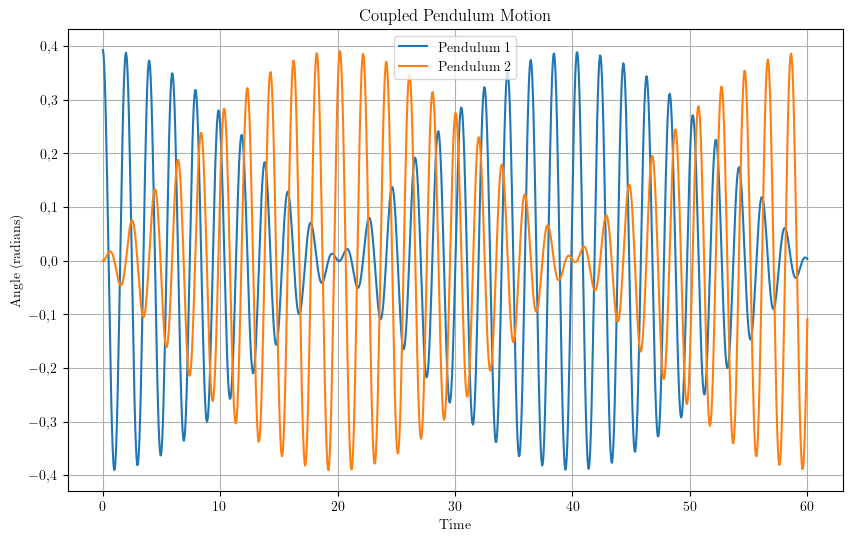

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of pendulums (m)
k = 0.5   # Coupling constant
m = 1.0   # Mass of pendulums (kg)

# Define the system of equations
def pendulum_system(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            - (g / L) * np.sin(theta1) - (k / m) * (theta1 - theta2),
            omega2,
            - (g / L) * np.sin(theta2) - (k / m) * (theta2 - theta1)]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 8, 0, 0, 0]

# Time span
t_span = (0, 60)  # Start and end time

# Solve the system of equations
sol = solve_ivp(pendulum_system, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Pendulum 1')
plt.plot(sol.t, sol.y[2], label='Pendulum 2')
plt.xlabel('Time')
plt.ylabel('Angle (radians)')
plt.title('Coupled Pendulum Motion')
plt.legend()
plt.grid()
plt.show()


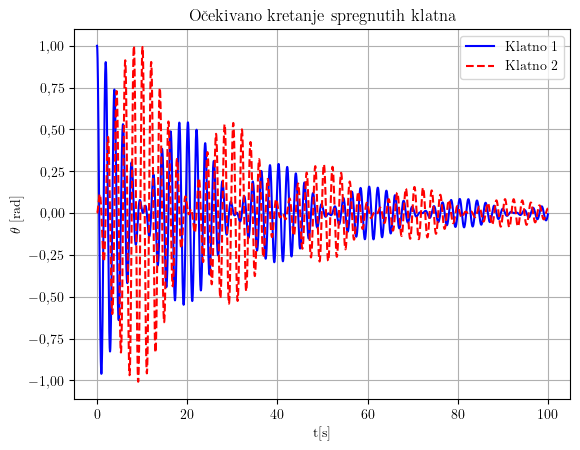

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of pendulums (m)
k = 1.0   # Coupling constant
m = 1.0   # Mass of pendulums (kg)
c = 0.06   # Damping coefficient

# Define the system of equations with damping
def pendulum_system_damped(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            - (g / L) * np.sin(theta1) - c * omega1 - (k / m) * (theta1 - theta2),
            omega2,
            - (g / L) * np.sin(theta2) - c * omega2 - (k / m) * (theta2 - theta1)]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 8, 0, 0, 0]

# Time span
t_span = (0, 100)  # Start and end time

# Solve the damped system of equations
sol = solve_ivp(pendulum_system_damped, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 10000))

#Skaliranje
sol.y[0] = sol.y[0]/np.max(sol.y[0])
sol.y[2] = sol.y[2]/np.max(sol.y[2])

# Plot results
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2], 'r', label='Klatno 2',linestyle='dashed')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Očekivano kretanje spregnutih klatna')
plt.legend()
plt.grid()
plt.savefig('py_teorija/spregnuto_mat.pdf', format='pdf', bbox_inches='tight')
#plt.show()


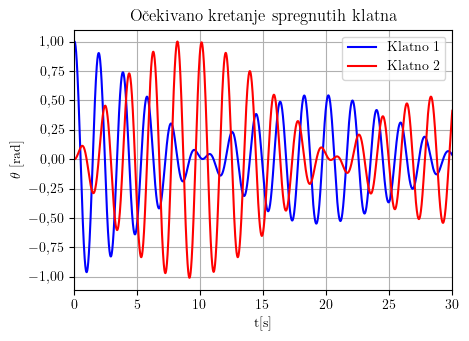

In [140]:
#Zoomirano
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2], 'r', label='Klatno 2')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Očekivano kretanje spregnutih klatna')
plt.legend()

plt.xlim(0,30)

plt.grid()
#plt.show()
plt.savefig('py_teorija/spregnuto_mat_period.pdf', format='pdf', bbox_inches='tight')

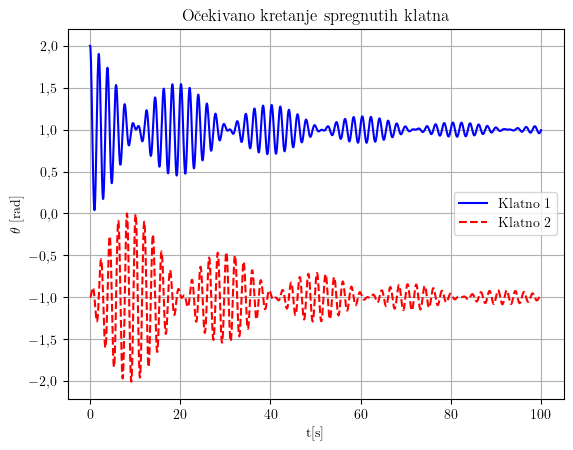

In [3]:
# Odvojeni
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0] + 1, 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2] - 1, 'r', label='Klatno 2',linestyle='dashed')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Očekivano kretanje spregnutih klatna')
plt.legend(loc='right')
plt.grid()
#plt.show()
plt.savefig('py_teorija/spregnuto_mat2.pdf', format='pdf', bbox_inches='tight')

<h2>Normalni modovi simetrije i antisimetrije</h2>

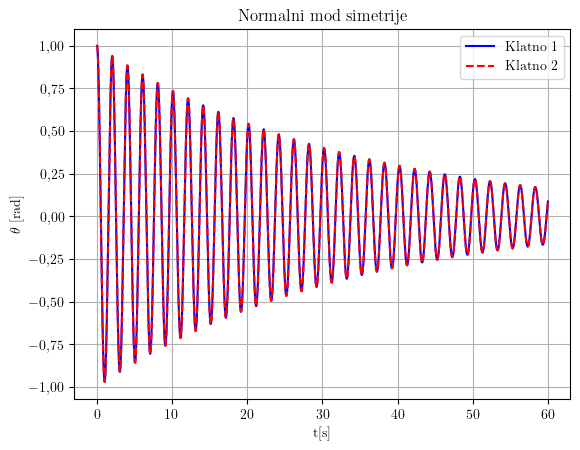

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of pendulums (m)
k = 1.0   # Coupling constant
m = 1.0   # Mass of pendulums (kg)
c = 0.06   # Damping coefficient

# Define the system of equations with damping
def pendulum_system_damped(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            - (g / L) * np.sin(theta1) - c * omega1 - (k / m) * (theta1 - theta2),
            omega2,
            - (g / L) * np.sin(theta2) - c * omega2 - (k / m) * (theta2 - theta1)]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 8, 0, np.pi / 8, 0]

# Time span
t_span = (0, 60)  # Start and end time

# Solve the damped system of equations
sol = solve_ivp(pendulum_system_damped, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 10000))

#Skaliranje
sol.y[0] = sol.y[0]/np.max(sol.y[0])
sol.y[2] = sol.y[2]/np.max(sol.y[2])

# Plot results
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2], 'r', label='Klatno 2',linestyle='dashed')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Normalni mod simetrije')
plt.legend()
plt.grid()
plt.savefig('py_teorija/nmod_simetrija.pdf', format='pdf', bbox_inches='tight')
#plt.show()


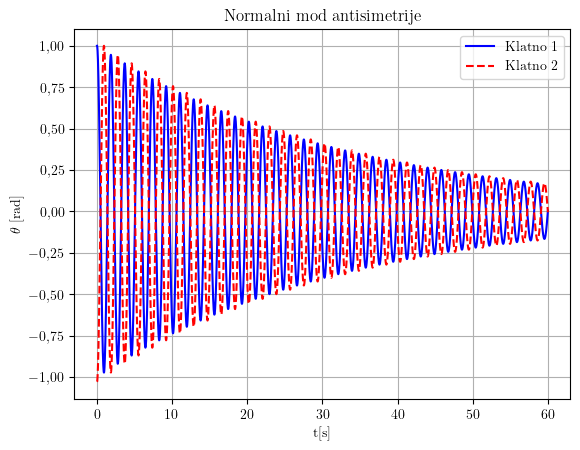

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of pendulums (m)
k = 1.0   # Coupling constant
m = 1.0   # Mass of pendulums (kg)
c = 0.06   # Damping coefficient

# Define the system of equations with damping
def pendulum_system_damped(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            - (g / L) * np.sin(theta1) - c * omega1 - (k / m) * (theta1 - theta2),
            omega2,
            - (g / L) * np.sin(theta2) - c * omega2 - (k / m) * (theta2 - theta1)]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 8, 0, -np.pi / 8, 0]

# Time span
t_span = (0, 60)  # Start and end time

# Solve the damped system of equations
sol = solve_ivp(pendulum_system_damped, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 10000))

#Skaliranje
sol.y[0] = sol.y[0]/np.max(sol.y[0])
sol.y[2] = sol.y[2]/np.max(sol.y[2])

# Plot results
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2], 'r', label='Klatno 2',linestyle='dashed')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Normalni mod antisimetrije')
plt.legend()
plt.grid()
plt.savefig('py_teorija/nmod_asimetrija.pdf', format='pdf', bbox_inches='tight')
#plt.show()
